# K-means++

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sys

## 生成数据

In [3]:
mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100) 
   
mean_02 = np.array([6.0, 7.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100) 
   
mean_03 = np.array([7.0, -5.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100) 
   
mean_04 = np.array([2.0, -7.0]) 
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100) 
   
data = np.vstack((dist_01, dist_02, dist_03, dist_04)) 
np.random.shuffle(data)

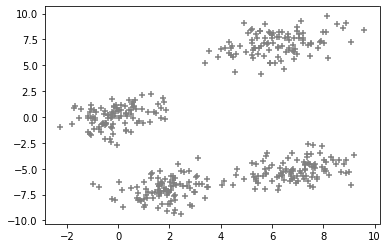

In [4]:
plt.scatter(data[:, 0], data[:, 1], marker = '+', color = 'gray')
plt.show()

## 初始化K个中心点

In [5]:
def plot(data, centroids): 
    #plt.figure(figsize=(13,8))
    plt.scatter(data[:, 0], data[:, 1], marker = '+', alpha = 0.3,
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'green', s= 200,label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', s= 200,label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
      
    plt.legend() 
    plt.xlim(-5, 12) 
    plt.ylim(-10, 15) 
    plt.show()

In [6]:
# euclidean distance 
def distance(p1, p2): 
    return np.sum((p1 - p2)**2)

In [113]:
def initialize(data, k): 

    # initialize the centroids list and add 
    # a randomly selected data point to the list 
    centroids = [] 
    centroids.append(data[np.random.randint(data.shape[0]), :]) 
    plot(data, np.array(centroids)) 
    plt.pause(1.0)
   
    # compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
        
        display.clear_output(wait=True)
          
        # initialize a list to store distances of data 
        # points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            # compute distance of 'point' from each of the previously 
            # selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        # select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
        plot(data, np.array(centroids))        
        plt.pause(1.0)
        %matplotlib inline
    return np.array(centroids)

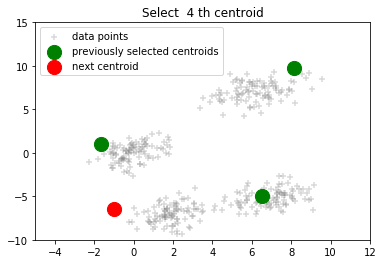

In [121]:
init_centroids = initialize(data, k = 4)

## 聚类

In [99]:
def show_clusters(data, k, centroids, clusters):  
    
    num_samples, dim = data.shape  
    mark = ['g', 'r', 'c', 'b', 'm', 'y', 'k', 'w']  

    # draw all samples  
    for i in range(num_samples):  
        mark_index = int(clusters[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[mark_index], marker = '+', alpha = 0.3)  

    # draw the centroids  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], marker = 'o', markersize = 12)  

    plt.show() 

In [125]:
def kmeans(data, k, centroids):  
    num_samples = data.shape[0]
    
    # first column stores which cluster this sample belongs to,  
    # second column stores the error between this sample and its centroid  
    clusters = np.mat(np.zeros((num_samples, 2)))
    cluster_changed = True
    iteration = 0
    
    while cluster_changed:
        
        display.clear_output(wait=True)
        plt.title('%d th iteration'%(iteration))
        
        show_clusters(data, k, centroids, clusters)
        cluster_changed = False  
        for i in range(num_samples):
            min_dist  = sys.maxsize
            min_index = 0  
            # for each centroid find the centroid who is closest  
            for j in range(k):  
                dist = distance(data[i, :], centroids[j,:])  
                if dist < min_dist:  
                    min_dist  = dist  
                    min_index = j  

            # update its cluster 
            if clusters[i, 0] != min_index:  
                cluster_changed = True  
                clusters[i, :] = min_index, min_dist
  
        # update centroids  
        for j in range(k):  
            points_in_cluster = data[np.nonzero(clusters[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(points_in_cluster, axis = 0)
            
        plt.pause(1.0)
        %matplotlib inline
        
        iteration += 1
        
    print ('Cluster complete!')

    return centroids, clusters 

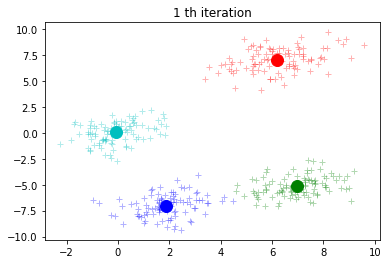

Cluster complete!


In [126]:
final_centroids, clusters = kmeans(data, 4, init_centroids)